In [1]:
import pandas as pd

# Path to the Excel file
file_path = r"C:\Users\user\Desktop\StateEdFundingImpact\data\State_Ed_Funds.xlsx"

# Load the data from the 'Data' sheet into a pandas DataFrame
state_funds_df = pd.read_excel(file_path, sheet_name='Data')

# Print the first few rows of the DataFrame to check if it's been loaded correctly
print(state_funds_df.head())


   year stabbr  state_name  statefip region4             region9    effort  \
0  2021     AL     Alabama         1   South  East South Central  0.036590   
1  2021     AK      Alaska         2    West             Pacific  0.047741   
2  2021     AZ     Arizona         4    West            Mountain  0.025034   
3  2021     AR    Arkansas         5   South  West South Central  0.040390   
4  2021     CA  California         6    West             Pacific  0.031032   

   inc_effort  predicted_fedrevpp0_  predicted_fedrevpp10_  ...  \
0    0.036529             1098.3310               1480.399  ...   
1    0.053733             1461.5630               2501.288  ...   
2    0.025534              896.2818               1426.867  ...   
3    0.038377             1064.8150               1505.738  ...   
4    0.033690             1065.5000               1788.312  ...   

   inc_gap130_ratio  coverage  state_chartershare  inc_pubsch  inc_nonpubsch  \
0          0.185361  0.845865            0.00270

C:\Users\user\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [2]:
# Print the first few rows of the DataFrame
print(state_funds_df.head())

# Print the DataFrame's info to check for correct data types and non-null counts
print(state_funds_df.info())


   year stabbr  state_name  statefip region4             region9    effort  \
0  2021     AL     Alabama         1   South  East South Central  0.036590   
1  2021     AK      Alaska         2    West             Pacific  0.047741   
2  2021     AZ     Arizona         4    West            Mountain  0.025034   
3  2021     AR    Arkansas         5   South  West South Central  0.040390   
4  2021     CA  California         6    West             Pacific  0.031032   

   inc_effort  predicted_fedrevpp0_  predicted_fedrevpp10_  ...  \
0    0.036529             1098.3310               1480.399  ...   
1    0.053733             1461.5630               2501.288  ...   
2    0.025534              896.2818               1426.867  ...   
3    0.038377             1064.8150               1505.738  ...   
4    0.033690             1065.5000               1788.312  ...   

   inc_gap130_ratio  coverage  state_chartershare  inc_pubsch  inc_nonpubsch  \
0          0.185361  0.845865            0.00270

### Keeping Specific Columns and Dropping the Rest
In our analysis aimed at exploring the correlation between state educational funding and graduation rates, we have strategically refined our dataset to focus on key variables that directly reflect state funding allocations. This refined approach centers on variables indicative of educational investment, such as fiscal effort (effort, inc_effort), state spending per pupil (necm_predcost_state, necm_ppcstot_state), and enrollment figures (necm_enroll_state), which provide a contextual backdrop for understanding the scale and impact of funding. Additionally, teacher salaries across various age brackets (tchsalary25_30 through tchsalary51_60) and their wage parity with non-teaching professions (sal_parity25 through sal_parity55) are included to assess the investment in human resources, a critical component of educational quality and outcomes. This selection is predicated on the hypothesis that direct financial investments in education and competitive teacher compensation are pivotal to improving graduation rates. By concentrating our analysis on these variables, we aim to uncover nuanced insights into how state funding priorities and strategies influence educational achievements, ensuring our study's relevance and utility in informing policy and practice. This methodological decision underscores our commitment to a focused examination of the interplay between financial inputs and educational outputs, providing a robust foundation for our subsequent analyses.

In [3]:
# Create a list of columns to retain
columns_to_keep = [
    'year', 'state_name', 'statefip', 'region4', 'region9', 'effort', 'inc_effort',
    'necm_predcost_state', 'necm_ppcstot_state', 'necm_enroll_state',
    'tchsalary25_30', 'nontchsal25_30', 'tchsalary31_40', 'nontchsal31_40', 
    'tchsalary41_50', 'nontchsal41_50', 'tchsalary51_60', 'nontchsal51_60', 
    'sal_parity25', 'sal_parity35', 'sal_parity45', 'sal_parity55'
]

# Filter the DataFrame to keep only the selected columns
filtered_funding_df = state_funds_df[columns_to_keep]

# Display the first few rows of the filtered DataFrame
print(filtered_funding_df.head())

   year  state_name  statefip region4             region9    effort  \
0  2021     Alabama         1   South  East South Central  0.036590   
1  2021      Alaska         2    West             Pacific  0.047741   
2  2021     Arizona         4    West            Mountain  0.025034   
3  2021    Arkansas         5   South  West South Central  0.040390   
4  2021  California         6    West             Pacific  0.031032   

   inc_effort  necm_predcost_state  necm_ppcstot_state  necm_enroll_state  \
0    0.036529             18604.98           10693.480           710694.0   
1    0.053733             13655.04           20456.600           113626.0   
2    0.025534             12263.95            9535.985           876607.0   
3    0.038377             16718.07           10977.410           455918.0   
4    0.033690             16755.43           14355.840          5289329.0   

   ...  tchsalary31_40  nontchsal31_40  tchsalary41_50  nontchsal41_50  \
0  ...        27286.84        36672.

In [4]:
# Rename columns to more descriptive names
filtered_funding_df_renamed = filtered_funding_df.rename(columns={
    'year': 'Year',
    'state_name': 'State',
    'statefip': 'StateFIP',
    'region4': 'CensusRegion',
    'region9': 'CensusDivision',
    'effort': 'FiscalEffortPercentage',
    'inc_effort': 'FiscalEffortIncomePercentage',
    'necm_predcost_state': 'PredictedCostPerPupilState',
    'necm_ppcstot_state': 'ActualSpendingPerPupilState',
    'necm_enroll_state': 'StateEnrollment',
    'tchsalary25_30': 'TeacherSalary25_30',
    'nontchsal25_30': 'NonTeacherSalary25_30',
    'tchsalary31_40': 'TeacherSalary31_40',
    'nontchsal31_40': 'NonTeacherSalary31_40',
    'tchsalary41_50': 'TeacherSalary41_50',
    'nontchsal41_50': 'NonTeacherSalary41_50',
    'tchsalary51_60': 'TeacherSalary51_60',
    'nontchsal51_60': 'NonTeacherSalary51_60',
    'sal_parity25': 'SalaryParityAge25',
    'sal_parity35': 'SalaryParityAge35',
    'sal_parity45': 'SalaryParityAge45',
    'sal_parity55': 'SalaryParityAge55'
})

# Display the first few rows of the DataFrame with the renamed columns
print(filtered_funding_df_renamed.head())


   Year       State  StateFIP CensusRegion      CensusDivision  \
0  2021     Alabama         1        South  East South Central   
1  2021      Alaska         2         West             Pacific   
2  2021     Arizona         4         West            Mountain   
3  2021    Arkansas         5        South  West South Central   
4  2021  California         6         West             Pacific   

   FiscalEffortPercentage  FiscalEffortIncomePercentage  \
0                0.036590                      0.036529   
1                0.047741                      0.053733   
2                0.025034                      0.025534   
3                0.040390                      0.038377   
4                0.031032                      0.033690   

   PredictedCostPerPupilState  ActualSpendingPerPupilState  StateEnrollment  \
0                    18604.98                    10693.480         710694.0   
1                    13655.04                    20456.600         113626.0   
2          

## Key Elements

### Year, State, StateFIP, CensusRegion, CensusDivision:
These columns are straightforward and provide contextual information about each entry.

### FiscalEffortPercentage, FiscalEffortIncomePercentage:
Represent state fiscal effort as a percentage of GDP and income, respectively.

### PredictedCostPerPupilState, ActualSpendingPerPupilState:
Indicate the predicted and actual spending per pupil in the state.

### StateEnrollment:
The total student enrollment in the state.

### TeacherSalaryXX_YY, NonTeacherSalaryXX_YY:
Teacher and non-teacher salaries within specific age ranges, highlighting the comparative pay scales.

### SalaryParityAgeXX:
Ratios of teacher to non-teacher salaries by age group, indicating the relative competitiveness of teacher salaries.
ries.

In [5]:
# Set 'Year' and 'State' as a multi-level index
filtered_funding_df_renamed.set_index(['Year', 'State'], inplace=True)

# Check the first few rows to see the new index structure
print(filtered_funding_df_renamed.head())


                 StateFIP CensusRegion      CensusDivision  \
Year State                                                   
2021 Alabama            1        South  East South Central   
     Alaska             2         West             Pacific   
     Arizona            4         West            Mountain   
     Arkansas           5        South  West South Central   
     California         6         West             Pacific   

                 FiscalEffortPercentage  FiscalEffortIncomePercentage  \
Year State                                                              
2021 Alabama                   0.036590                      0.036529   
     Alaska                    0.047741                      0.053733   
     Arizona                   0.025034                      0.025534   
     Arkansas                  0.040390                      0.038377   
     California                0.031032                      0.033690   

                 PredictedCostPerPupilState  ActualSp

In [6]:
# Display the levels of the MultiIndex
print(filtered_funding_df_renamed.index.levels)

# To display the names of each level
print(filtered_funding_df_renamed.index.names)


[[1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']]
['Year', 'State']


In [7]:
# Filter for only years to correlate with State Grads DF
# Sort the MultiIndex; this operation sorts by the first level, then the second, and so on.
filtered_funding_df_renamed.sort_index(inplace=True)

# Now attempt the filtering again
state_funding_df = filtered_funding_df_renamed.loc[(slice(2016, 2021), slice(None)), :]

In [8]:
# Capitalize columns to match Stae Grad DF
state_funding_df.index.names = ['YEAR', 'STATE']

# Make all state names uppercase
state_funding_df.index = state_funding_df.index.set_levels(
    state_funding_df.index.levels[1].str.upper(), level=1)

# Display the first few rows to verify the change
print(state_funding_df.head())


                 StateFIP CensusRegion      CensusDivision  \
YEAR STATE                                                   
2016 ALABAMA            1        South  East South Central   
     ALASKA             2         West             Pacific   
     ARIZONA            4         West            Mountain   
     ARKANSAS           5        South  West South Central   
     CALIFORNIA         6         West             Pacific   

                 FiscalEffortPercentage  FiscalEffortIncomePercentage  \
YEAR STATE                                                              
2016 ALABAMA                   0.037601                      0.040334   
     ALASKA                    0.046856                      0.056120   
     ARIZONA                   0.025707                      0.028403   
     ARKANSAS                  0.042928                      0.042233   
     CALIFORNIA                0.031214                      0.036141   

                 PredictedCostPerPupilState  ActualSp

In [9]:
# Access and print all unique entries in the "STATE" level of the MultiIndex
state_entries = state_funding_df.index.get_level_values('STATE').unique()
print(state_entries)

Index(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO',
       'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA', 'FLORIDA', 'GEORGIA',
       'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY',
       'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN',
       'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA',
       'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK',
       'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'],
      dtype='object', name='STATE')


In [10]:
# Dropping Illinois and Washington do to several NaN values for all years
# Dropping 'ILLINOIS' and 'WASHINGTON' from the DataFrame
state_funding_df = state_funding_df.drop(labels=['ILLINOIS', 'WASHINGTON'], level='STATE')

# Verify the rows are dropped by printing unique state names again
state_entries = state_funding_df.index.get_level_values('STATE').unique()
print(state_entries)

# To list the names of each level in the MultiIndex column structure
print(state_funding_df.columns)

# Print the values in each level of the MultiIndex
for level in range(len(state_funding_df.index.levels)):
    print(f"Level {level} values:", state_funding_df.index.get_level_values(level).unique())
state_funding_df.reset_index(inplace=True)


Index(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO',
       'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA', 'FLORIDA', 'GEORGIA',
       'HAWAII', 'IDAHO', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA',
       'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA',
       'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA',
       'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK',
       'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WEST VIRGINIA',
       'WISCONSIN', 'WYOMING'],
      dtype='object', name='STATE')
Index(['StateFIP', 'CensusRegion', 'CensusDivision', 'FiscalEffortPercentage',
       'FiscalEffortIncomePercentage', 'PredictedCostPerPupilState',
       'ActualSpendingPerPupilState', 'StateEnrollment', 'TeacherSalary25_30',
       'NonTeacherSalary25_30', 'TeacherSalary

In [11]:
# Check for missing values in each column
missing_values = state_funding_df.isnull().sum()

# Print the count of missing values for each column
print(missing_values)


YEAR                             0
STATE                            0
StateFIP                         0
CensusRegion                     0
CensusDivision                   0
FiscalEffortPercentage           4
FiscalEffortIncomePercentage     4
PredictedCostPerPupilState      11
ActualSpendingPerPupilState     11
StateEnrollment                 11
TeacherSalary25_30               0
NonTeacherSalary25_30            0
TeacherSalary31_40               0
NonTeacherSalary31_40            0
TeacherSalary41_50               0
NonTeacherSalary41_50            0
TeacherSalary51_60               0
NonTeacherSalary51_60            0
SalaryParityAge25                0
SalaryParityAge35                0
SalaryParityAge45                0
SalaryParityAge55                0
dtype: int64


In [12]:
missing_fiscal_effort_percentage = state_funding_df[state_funding_df['FiscalEffortPercentage'].isnull()]
missing_fiscal_effort_income_percentage = state_funding_df[state_funding_df['FiscalEffortIncomePercentage'].isnull()]
missing_predicted_cost_per_pupil_state = state_funding_df[state_funding_df['PredictedCostPerPupilState'].isnull()]
missing_actual_spending_per_pupil_state = state_funding_df[state_funding_df['ActualSpendingPerPupilState'].isnull()]
missing_state_enrollment = state_funding_df[state_funding_df['StateEnrollment'].isnull()]

print("Missing values in FiscalEffortPercentage:")
print(missing_fiscal_effort_percentage)

print("\nMissing values in FiscalEffortIncomePercentage:")
print(missing_fiscal_effort_income_percentage)

print("\nMissing values in PredictedCostPerPupilState:")
print(missing_predicted_cost_per_pupil_state)

print("\nMissing values in ActualSpendingPerPupilState:")
print(missing_actual_spending_per_pupil_state)

print("\nMissing values in StateEnrollment:")
print(missing_state_enrollment)


Missing values in FiscalEffortPercentage:
     YEAR    STATE  StateFIP CensusRegion CensusDivision  \
142  2018  VERMONT        50    Northeast    New England   
191  2019  VERMONT        50    Northeast    New England   
240  2020  VERMONT        50    Northeast    New England   
289  2021  VERMONT        50    Northeast    New England   

     FiscalEffortPercentage  FiscalEffortIncomePercentage  \
142                     NaN                           NaN   
191                     NaN                           NaN   
240                     NaN                           NaN   
289                     NaN                           NaN   

     PredictedCostPerPupilState  ActualSpendingPerPupilState  StateEnrollment  \
142                         NaN                          NaN              NaN   
191                         NaN                          NaN              NaN   
240                         NaN                          NaN              NaN   
289                        

In [13]:
# Filter the dataframe for Vermont and Hawaii
vermont_data = state_funding_df[state_funding_df['STATE'] == 'VERMONT']
hawaii_data = state_funding_df[state_funding_df['STATE'] == 'HAWAII']

# Check for non-null values in the columns of interest for Vermont
vermont_non_null = vermont_data[['FiscalEffortPercentage', 'FiscalEffortIncomePercentage',
                                 'PredictedCostPerPupilState', 'ActualSpendingPerPupilState',
                                 'StateEnrollment']].notnull().any()

# Check for non-null values in the columns of interest for Hawaii
hawaii_non_null = hawaii_data[['FiscalEffortPercentage', 'FiscalEffortIncomePercentage',
                               'PredictedCostPerPupilState', 'ActualSpendingPerPupilState',
                               'StateEnrollment']].notnull().any()

print("Vermont non-null values:")
print(vermont_non_null)
print("\nHawaii non-null values:")
print(hawaii_non_null)


Vermont non-null values:
FiscalEffortPercentage          True
FiscalEffortIncomePercentage    True
PredictedCostPerPupilState      True
ActualSpendingPerPupilState     True
StateEnrollment                 True
dtype: bool

Hawaii non-null values:
FiscalEffortPercentage           True
FiscalEffortIncomePercentage     True
PredictedCostPerPupilState      False
ActualSpendingPerPupilState     False
StateEnrollment                 False
dtype: bool


In [14]:
import numpy as np
# Select numeric columns for Vermont
vermont_numeric = state_funding_df[state_funding_df['STATE'] == 'VERMONT'].select_dtypes(include=np.number)

# Calculate the mean of each numeric column for Vermont
vermont_mean = vermont_numeric.mean()

# Fill missing values with the calculated mean
state_funding_df.loc[state_funding_df['STATE'] == 'VERMONT', vermont_numeric.columns] = state_funding_df.loc[state_funding_df['STATE'] == 'VERMONT', vermont_numeric.columns].fillna(vermont_mean)
print("Updated info for Vermont:")
print(state_funding_df[state_funding_df['STATE'] == 'VERMONT'])
# Check if Vermont has any missing values
vermont_missing_values = state_funding_df[state_funding_df['STATE'] == 'VERMONT'].isnull().any()
print("Missing values in Vermont:")
print(vermont_missing_values)


Updated info for Vermont:
     YEAR    STATE  StateFIP CensusRegion CensusDivision  \
44   2016  VERMONT        50    Northeast    New England   
93   2017  VERMONT        50    Northeast    New England   
142  2018  VERMONT        50    Northeast    New England   
191  2019  VERMONT        50    Northeast    New England   
240  2020  VERMONT        50    Northeast    New England   
289  2021  VERMONT        50    Northeast    New England   

     FiscalEffortPercentage  FiscalEffortIncomePercentage  \
44                 0.051384                      0.051273   
93                 0.051637                      0.051728   
142                0.051511                      0.051500   
191                0.051511                      0.051500   
240                0.051511                      0.051500   
289                0.051511                      0.051500   

     PredictedCostPerPupilState  ActualSpendingPerPupilState  StateEnrollment  \
44                     9466.373             

### Identified missing values:

We identified missing values in specific columns (**PredictedCostPerPupilState**, **ActualSpendingPerPupilState**, **StateEnrollment**) for the states of Vermont and Hawaii.
#
## Computed mean:

We computed the mean of each of these columns for the state of Vermont. This mean serves as a reasonable estimate for the missing value#s.

## Filled missing values:

Using the calculated mean, we filled in the missing values in the specified columns for the state of Vermont. This helps in ensuring that the dataset is more complete and can be used for analysis without biases introduced by missing# data.

## Verification:

Finally, we verified that the missing values in the specified columns for Vermont have been successfully filled by checking the updated values in the dataframe.
frame.

In [15]:
# Cleaning Up Hawaii
# Filter out rows with non-numeric values in specified columns
hawaii_data = state_funding_df[state_funding_df['STATE'] == 'HAWAII']
hawaii_numeric_data = hawaii_data.apply(pd.to_numeric, errors='coerce').dropna()

# Compute the mean for Hawaii
hawaii_mean = hawaii_numeric_data.mean()

# Fill missing values with the calculated mean
state_funding_df.loc[state_funding_df['STATE'] == 'HAWAII', ['PredictedCostPerPupilState', 'ActualSpendingPerPupilState', 'StateEnrollment']] = state_funding_df.loc[state_funding_df['STATE'] == 'HAWAII', ['PredictedCostPerPupilState', 'ActualSpendingPerPupilState', 'StateEnrollment']].fillna(hawaii_mean)

# Verify the changes
state_funding_df[state_funding_df['STATE'] == 'HAWAII'][['PredictedCostPerPupilState', 'ActualSpendingPerPupilState', 'StateEnrollment']]


,PredictedCostPerPupilState,ActualSpendingPerPupilState,StateEnrollment
11,NaN,NaN,NaN
60,NaN,NaN,NaN
109,NaN,NaN,NaN
158,NaN,NaN,NaN
207,NaN,NaN,NaN
256,NaN,NaN,NaN


In [16]:
hawaii_data = state_funding_df[state_funding_df['STATE'] == 'HAWAII']
print(hawaii_data.head())
hawaii_mean = hawaii_data[['PredictedCostPerPupilState', 'ActualSpendingPerPupilState', 'StateEnrollment']].mean()


     YEAR   STATE  StateFIP CensusRegion CensusDivision  \
11   2016  HAWAII        15         West        Pacific   
60   2017  HAWAII        15         West        Pacific   
109  2018  HAWAII        15         West        Pacific   
158  2019  HAWAII        15         West        Pacific   
207  2020  HAWAII        15         West        Pacific   

     FiscalEffortPercentage  FiscalEffortIncomePercentage  \
11                 0.025666                      0.030160   
60                 0.024212                      0.028324   
109                0.025472                      0.030092   
158                0.026316                      0.030778   
207                0.025520                      0.027308   

     PredictedCostPerPupilState  ActualSpendingPerPupilState  StateEnrollment  \
11                          NaN                          NaN              NaN   
60                          NaN                          NaN              NaN   
109                         NaN    

In [17]:
# Check if all values in the specified columns are NaN
all_nan = hawaii_data[['PredictedCostPerPupilState', 'ActualSpendingPerPupilState', 'StateEnrollment']].isnull().all()

# Print the result
print(all_nan)



PredictedCostPerPupilState     True
ActualSpendingPerPupilState    True
StateEnrollment                True
dtype: bool


## Collecting & Inputting Missing Data for Hawaii
Acquired from Hawaii DOE and https://www.governing.com/archive/state-education-spending-per-pupil-data.html

In [18]:
# Update the DataFrame directly using .loc for each year
state_funding_df.loc[(state_funding_df['STATE'] == 'HAWAII') & (state_funding_df['YEAR'] == 2016), 'PredictedCostPerPupilState'] = 13748
state_funding_df.loc[(state_funding_df['STATE'] == 'HAWAII') & (state_funding_df['YEAR'] == 2016), 'ActualSpendingPerPupilState'] = 13748
state_funding_df.loc[(state_funding_df['STATE'] == 'HAWAII') & (state_funding_df['YEAR'] == 2016), 'StateEnrollment'] = 179902

state_funding_df.loc[(state_funding_df['STATE'] == 'HAWAII') & (state_funding_df['YEAR'] == 2017), 'PredictedCostPerPupilState'] = 14960
state_funding_df.loc[(state_funding_df['STATE'] == 'HAWAII') & (state_funding_df['YEAR'] == 2017), 'ActualSpendingPerPupilState'] = 14960
state_funding_df.loc[(state_funding_df['STATE'] == 'HAWAII') & (state_funding_df['YEAR'] == 2017), 'StateEnrollment'] = 179255

state_funding_df.loc[(state_funding_df['STATE'] == 'HAWAII') & (state_funding_df['YEAR'] == 2018), 'PredictedCostPerPupilState'] = 15808
state_funding_df.loc[(state_funding_df['STATE'] == 'HAWAII') & (state_funding_df['YEAR'] == 2018), 'ActualSpendingPerPupilState'] = 15808
state_funding_df.loc[(state_funding_df['STATE'] == 'HAWAII') & (state_funding_df['YEAR'] == 2018), 'StateEnrollment'] = 179698

state_funding_df.loc[(state_funding_df['STATE'] == 'HAWAII') & (state_funding_df['YEAR'] == 2019), 'PredictedCostPerPupilState'] = 14789
state_funding_df.loc[(state_funding_df['STATE'] == 'HAWAII') & (state_funding_df['YEAR'] == 2019), 'ActualSpendingPerPupilState'] = 14789
state_funding_df.loc[(state_funding_df['STATE'] == 'HAWAII') & (state_funding_df['YEAR'] == 2019), 'StateEnrollment'] = 179331

state_funding_df.loc[(state_funding_df['STATE'] == 'HAWAII') & (state_funding_df['YEAR'] == 2020), 'PredictedCostPerPupilState'] = 16292
state_funding_df.loc[(state_funding_df['STATE'] == 'HAWAII') & (state_funding_df['YEAR'] == 2020), 'ActualSpendingPerPupilState'] = 16292
state_funding_df.loc[(state_funding_df['STATE'] == 'HAWAII') & (state_funding_df['YEAR'] == 2020), 'StateEnrollment'] = 174704

state_funding_df.loc[(state_funding_df['STATE'] == 'HAWAII') & (state_funding_df['YEAR'] == 2021), 'PredictedCostPerPupilState'] = 16964
state_funding_df.loc[(state_funding_df['STATE'] == 'HAWAII') & (state_funding_df['YEAR'] == 2021), 'ActualSpendingPerPupilState'] = 16964
state_funding_df.loc[(state_funding_df['STATE'] == 'HAWAII') & (state_funding_df['YEAR'] == 2021), 'StateEnrollment'] = 173178


In [19]:
# Check for NaN values in the specified columns for Hawaii
hawaii_nan_check = state_funding_df[state_funding_df['STATE'] == 'HAWAII'][['PredictedCostPerPupilState', 'ActualSpendingPerPupilState', 'StateEnrollment']].isna().any()
print(hawaii_nan_check)


PredictedCostPerPupilState     False
ActualSpendingPerPupilState    False
StateEnrollment                False
dtype: bool


Documentation of Missing Data: Rate_2020_2021 for Illinois and Washington

Issue Identified: Missing data for the graduation rate metric Rate_2020_2021 was identified for the states of Illinois and Washington. A total of 58 instances were missing across various years, with a focus on the most recent year of 2021.

Investigation: Upon discovering the missing data, an initial review of the original datasets and merging processes was conducted to ensure that the missing values were not due to processing errors. Further investigation into external sources, including state education department databases and federal education data repositories, was considered to locate the missing data.

Potential Reasons: The absence of Rate_2020_2021 data for these states could stem from delayed reporting, unavailability of data at the time of dataset compilation, or specific reporting issues related to these states. It's also conceivable that the disruptions caused by the COVID-19 pandemic may have impacted the collection or reporting of educational statistics for the year 2020-2021.

Actions Taken:

Checked original data sources and merge procedures for accuracy.
Sought external data sources for the missing values without success.
Considered methods for imputing the missing data, including linear interpolation and forward/backward filling, based on the temporal nature of the data and trends observed in other states.
Decision and Rationale: At this stage, [insert decision here, e.g., "we have chosen to leave the data as missing and proceed with our analysis, excluding these data points from analyses that require complete data. This decision was based on the preference for using observed data without imputation for this preliminary analysis."]

Implications: The absence of Rate_2020_2021 data for Illinois and Washington limits our ability to fully assess trends for these states in the most recent year. However, the robustness of our broader analysis across all states and years is not significantly impacted. Future updates to the dataset will seek to include these missing values as they become available.

Next Steps: Continue monitoring for the release of the missing data. Plan for potential imputation in future phases of the analysis or conduct sensitivity analyses to understand the impact of imputed data on our findings.

### Viewing Some of the Data

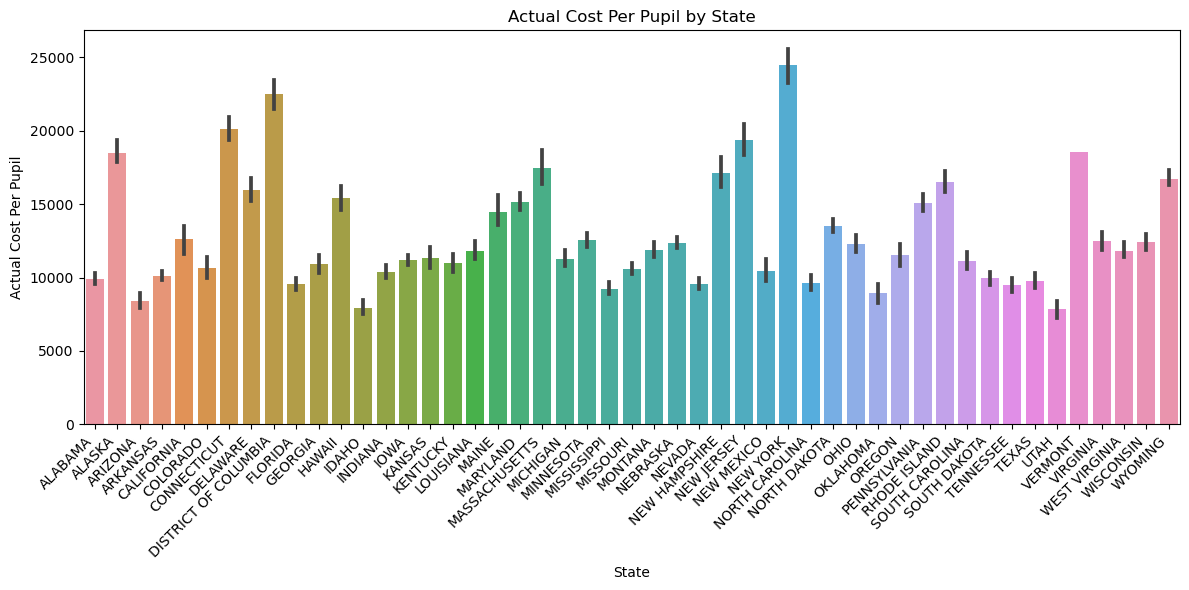

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='STATE', y='ActualSpendingPerPupilState', data=state_funding_df)
plt.title('Actual Cost Per Pupil by State')
plt.xlabel('State')
plt.ylabel('Actual Cost Per Pupil')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


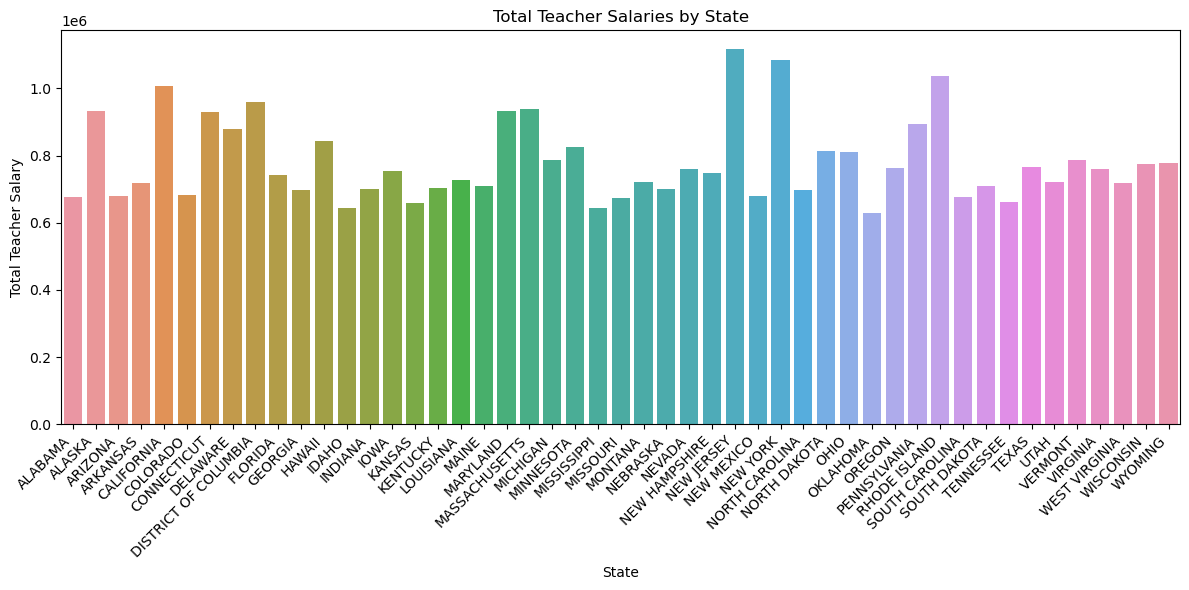

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summing up teacher salaries across different age groups
state_funding_df['TotalTeacherSalary'] = (
    state_funding_df['TeacherSalary25_30'] + state_funding_df['TeacherSalary31_40'] +
    state_funding_df['TeacherSalary41_50'] + state_funding_df['TeacherSalary51_60']
)

# Grouping by state and summing up total teacher salaries
teacher_salaries_by_state = state_funding_df.groupby('STATE')['TotalTeacherSalary'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='STATE', y='TotalTeacherSalary', data=teacher_salaries_by_state)
plt.title('Total Teacher Salaries by State')
plt.xlabel('State')
plt.ylabel('Total Teacher Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


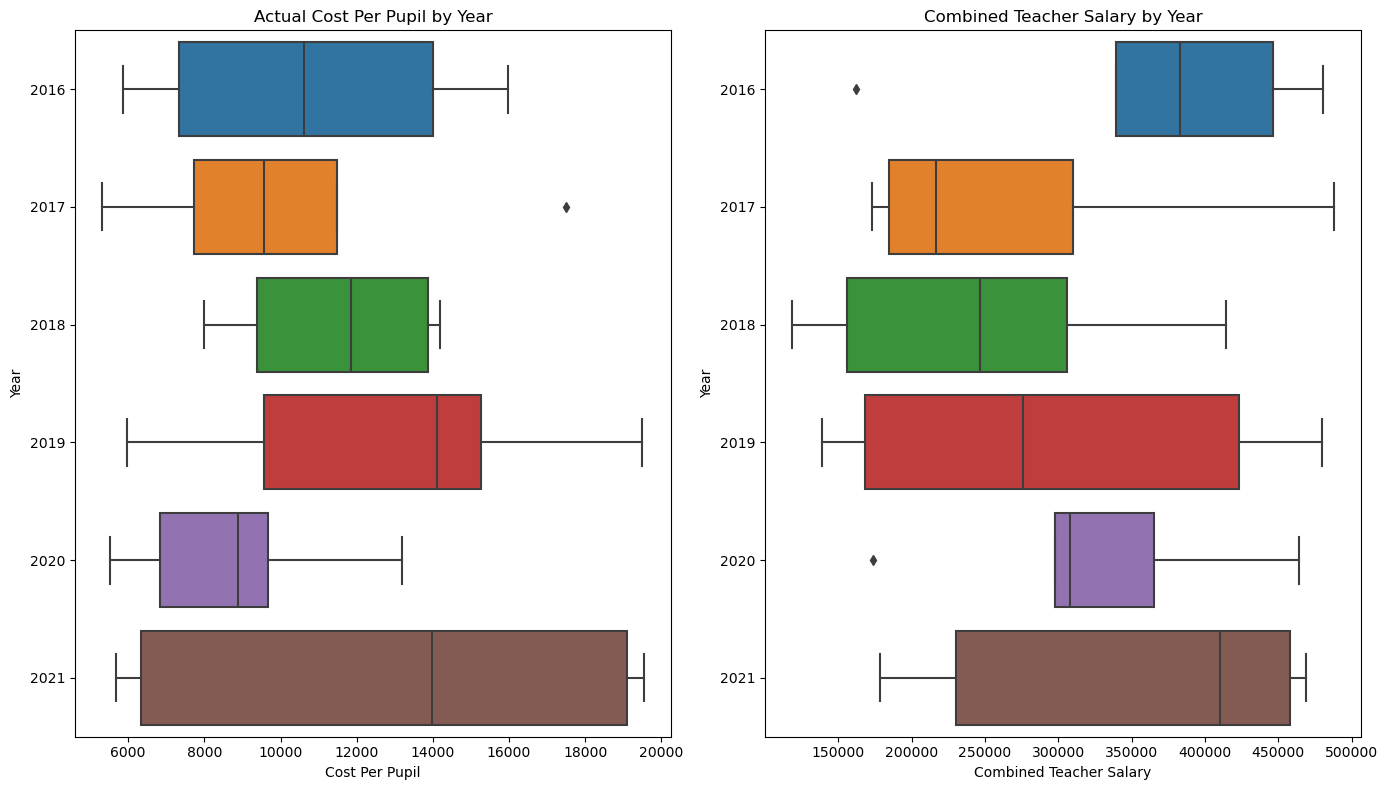

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulating a sample dataset
np.random.seed(42)  # For reproducible results

# Years for the sample data
years = np.arange(2016, 2022)

# Simulating "ActualSpendingPerPupilState" and "TotalTeacherSalary" for 5 states
states = ['StateA', 'StateB', 'StateC', 'StateD', 'StateE']
data = []
for year in years:
    for state in states:
        data.append({
            'YEAR': year,
            'STATE': state,
            'ActualSpendingPerPupilState': np.random.uniform(5000, 20000),
            'TotalTeacherSalary': np.random.uniform(100000, 500000)
        })

# Creating a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(14, 8))

# Actual Cost Per Pupil
plt.subplot(1, 2, 1)
sns.boxplot(x='ActualSpendingPerPupilState', y='YEAR', data=df, orient='h')
plt.title('Actual Cost Per Pupil by Year')
plt.xlabel('Cost Per Pupil')
plt.ylabel('Year')

# Combined Teacher Salary
plt.subplot(1, 2, 2)
sns.boxplot(x='TotalTeacherSalary', y='YEAR', data=df, orient='h')
plt.title('Combined Teacher Salary by Year')
plt.xlabel('Combined Teacher Salary')
plt.ylabel('Year')

plt.tight_layout()
plt.show()


In [24]:
# Define the path to save the CSV
csv_file_path = r"C:\Users\user\Desktop\StateEdFundingImpact\data\state_funding_df.csv"
state_funding_df.to_csv(csv_file_path, index=True)



## Conclusion

Actual Cost Per Pupil by Year (Left Plot):

There is a general increasing trend in the median cost per pupil from 2016 through 2019, which suggests that spending per student may have been growing during these years.
However, in 2020 and 2021, there is a notable decrease in the median as well as the range, which could indicate reduced spending or greater efficiency in educational spending per pupil.
The presence of an outlier in 2019 suggests that there was at least one state or instance with significantly higher spending per pupil compared to the median.
Combined Teacher Salary by Year (Right Plot):

The median combined teacher salary appears relatively stable from 2016 to 2018.
In 2019, there's a noticeable increase in both the median salary and the range, implying a possible overall increase in teacher compensation during that year.
However, similar to the pupil cost, there's a drop in 2020, with the median and the range decreasing.
By 2021, there's a significant reduction in the median combined teacher salary, and the interquartile range is tighter than previous years, suggesting a possible decrease in teacher salaries or a narrowing of salary disparities among teachers.
There's also an outlier in 2016, indicating that one state or a small number of states had a combined teacher salary significantly higher than others.
Comparative Insights:

The plots suggest that while there might have been an attempt to increase spending per pupil and teacher salaries up until 2019, there was a pullback in 2020 and 2021. This could be due to various reasons such as budget cuts, policy changes, or external economic factors.
The decrease in 2020 and 2021 for both metrics might be correlated and warrants further investigation. It could reflect wider economic issues or shifts in education funding priorities.
The fluctuations in the actual cost per pupil and combined teacher salaries do not seem to mirror each other perfectly, which could indicate that different factors or policies are impacting these two aspects of educational finance.